In [1]:
import pandas as pd
data=pd.read_csv('/home/kirti/Data_sets/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
survived=data['Survived'].sum(axis=0)
print('The number of survived passengers are: {}'.format(survived))

The number of survived passengers are: 342


In [27]:
aliveornot=data.groupby(['Pclass'])['Survived'].sum()
aliveornot

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [21]:
total=dict(data['Pclass'].value_counts())
total

{3: 491, 1: 216, 2: 184}

In [31]:
for key,value in total.items():
    print('The ration of people survived in {} Class are: {:.2f} '.format(key,aliveornot[key]/value))
    
    
    

The ration of people survived in 3 Class are: 0.24 
The ration of people survived in 1 Class are: 0.63 
The ration of people survived in 2 Class are: 0.47 


# Iris data set

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
import seaborn as sns
plt.style.available
plt.style.use('seaborn-whitegrid')
#sns.set(style='white', color_codes=True)

In [5]:
iris=pd.read_csv('/home/kirti/Data_sets/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<IPython.core.display.Javascript object>


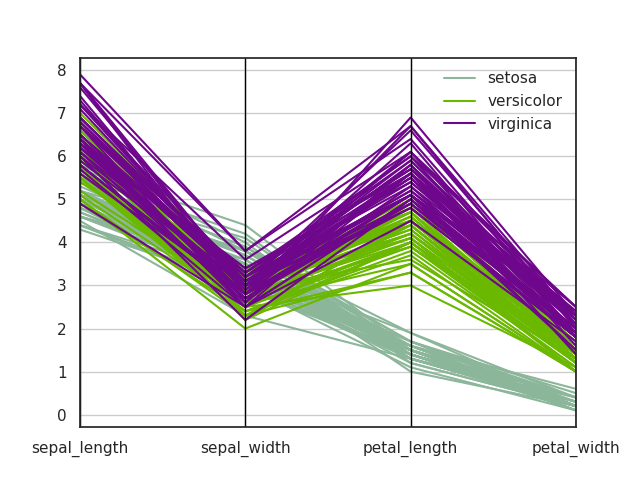

<AxesSubplot:>

In [6]:
plt.figure()
pd.plotting.parallel_coordinates(iris,'species')

In [27]:
sum_of_lengths=dict(iris.groupby(['species'])['sepal_length'].sum())
sum_of_lengths

{'setosa': 250.29999999999998,
 'versicolor': 296.8,
 'virginica': 329.3999999999999}

In [24]:
values=iris.groupby(['species']).count()
values               

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [28]:
for key,value in sum_of_lengths.items():
    x=value/50
    print('The average length of {} species is : {:.2f}'.format(key,x))

The average length of setosa species is : 5.01
The average length of versicolor species is : 5.94
The average length of virginica species is : 6.59


<IPython.core.display.Javascript object>


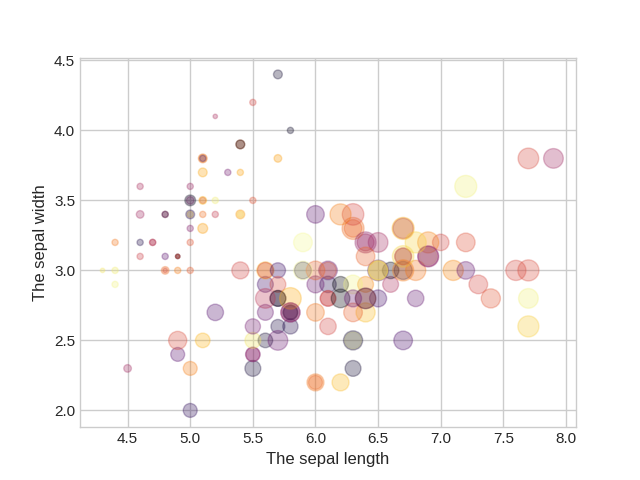

Text(0, 0.5, 'The sepal width')

In [12]:
plt.figure()
rng = np.random.RandomState(0)
colors = rng.rand(150)
plt.scatter(iris['sepal_length'],iris['sepal_width'],s=iris['petal_width']*100,c=colors,alpha=0.3,cmap='inferno')
plt.xlabel('The sepal length')
plt.ylabel('The sepal width')

# 

<IPython.core.display.Javascript object>


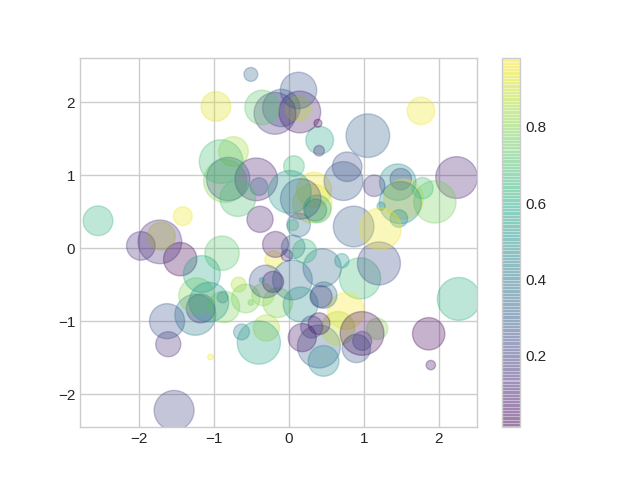

In [13]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
plt.figure()
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  

<IPython.core.display.Javascript object>


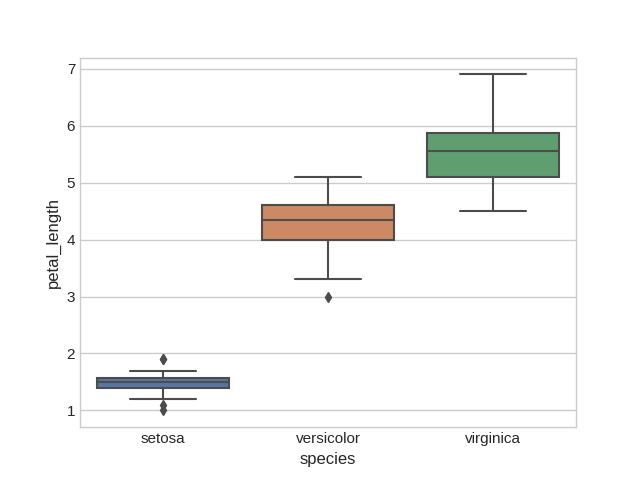

<AxesSubplot:xlabel='species', ylabel='petal_length'>

In [14]:
# use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
sns.boxplot(x='species',y='petal_length',data=iris)

<IPython.core.display.Javascript object>


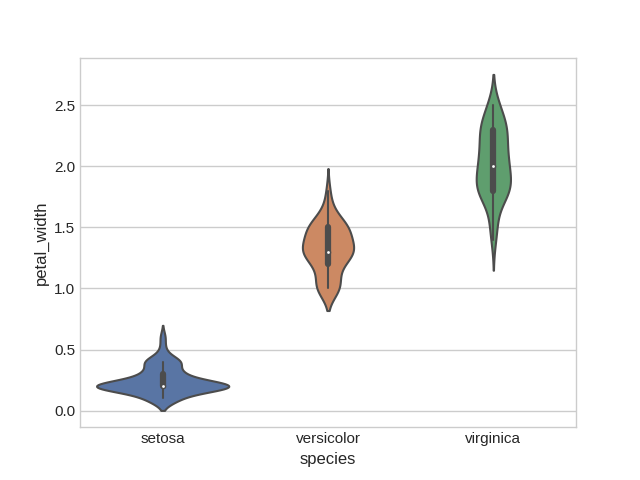

<AxesSubplot:xlabel='species', ylabel='petal_width'>

In [16]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x='species',y='petal_width',data=iris,size=6)

<IPython.core.display.Javascript object>


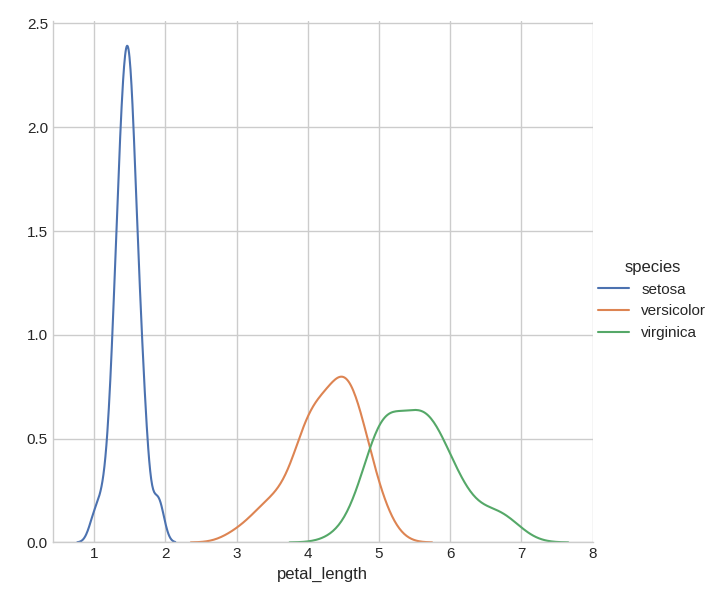

In [18]:
sns.FacetGrid(iris,hue='species',height=6) \
   .map(sns.kdeplot,'petal_length') \
   .add_legend()

<IPython.core.display.Javascript object>


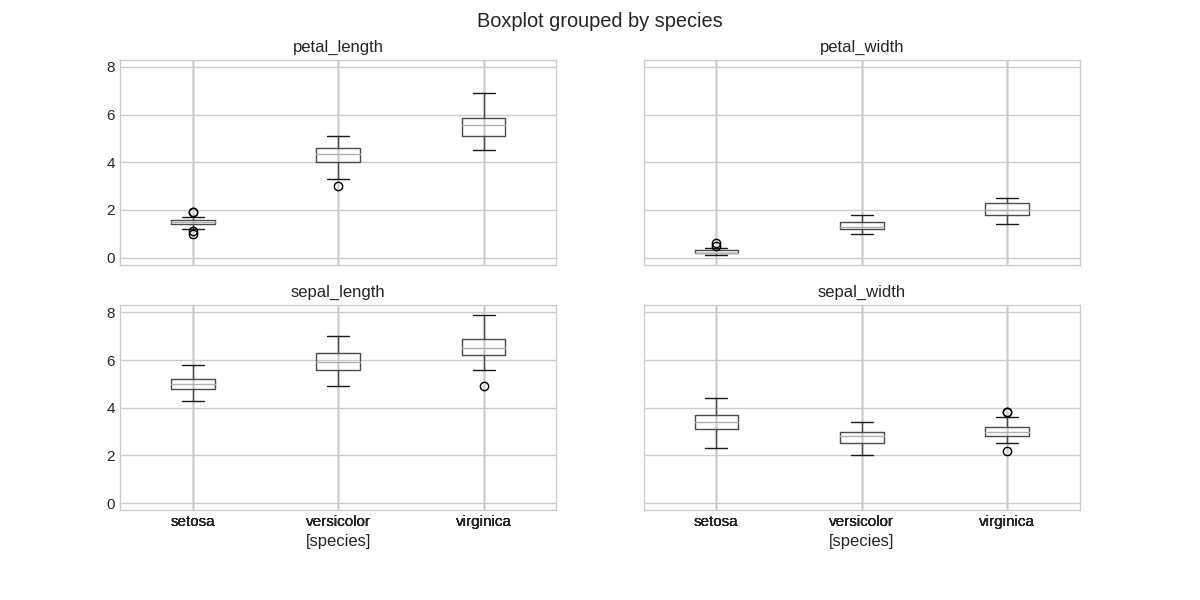

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

In [23]:

iris.boxplot(by='species',figsize=(12,6))


# Multivariate Analysis

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The iris data set analysis